In [ ]:
# [CH2] - 개인 과제
# 2. **비지도학습 과제** :: 고객 세분화 분석

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [62]:
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [59]:
# 컬럼 명칭 변경
df = df.rename(columns = {"Annual Income (k$)":"Income", "Spending Score (1-100)":"Score"})

# 컬럼 삭제
df = df.drop(['CustomerID'], axis=1)

# 레이블 인코딩 (Male: 1, Female: 0)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# 스케일링
# numerical_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

df.head()

,Gender,Age,Income,Score
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [42]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  200 non-null    int64
 1   Age     200 non-null    int64
 2   Income  200 non-null    int64
 3   Score   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [40]:
# for col in ['Age','Income','Score']:
#     fig, ax= plt.subplots(figsize=(5,3))
#     sns.boxplot(data=df, x='Gender', y=col,ax=ax)
#     ax.set_title(f"{col}")
#     plt.show()

In [41]:
numerical_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
type(scaled_data)

numpy.ndarray

KeyError: 'Gender'

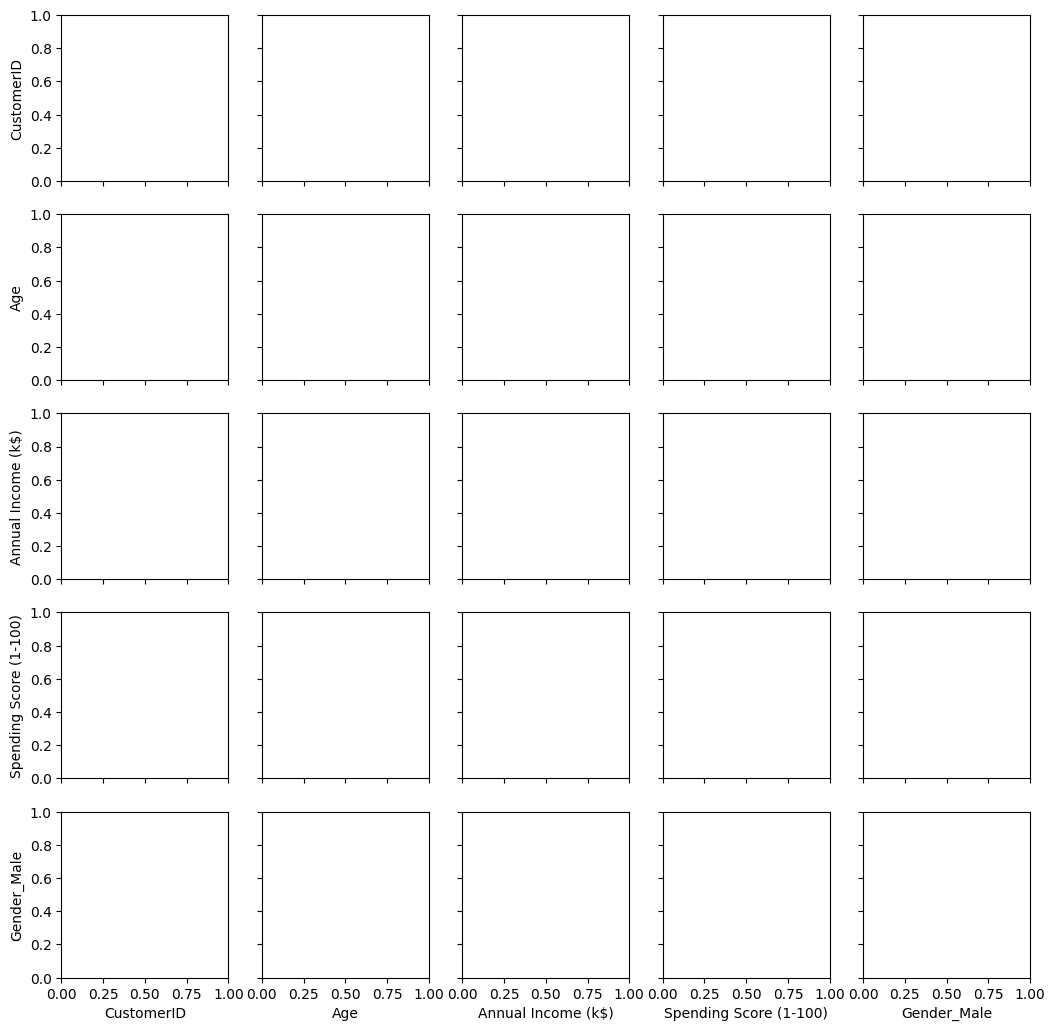

In [61]:
sns.pairplot(df, hue='Gender')